Outline:

1. Softmax cross entropy loss
    * Softmax
    * Log loss
1. Something else

In [12]:
# imports
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
%matplotlib inline

### Softmax math

$$ \text{Normalize}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{x_1}{x_1 + x_2 + x_3} \\ 
\frac{x_2}{x_1 + x_2 + x_3} \\
\frac{x_3}{x_1 + x_2 + x_3}
\end{bmatrix} $$

$$ \text{Softmax}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3}}
\end{bmatrix} $$

## Overall log loss formula

$$ \sum_{i}{(- y_i * log(p_i) - (1 - y_i) * log(1-p_i))} $$

## Intuition

### Case 1: $y_i = 0$

Formula becomes:

$$ \begin{align} &\sum_{i}{(- 0 * log(p_i) - (1 - 0) * log(1-p_i))} \\
=  &\sum_{i}{- log(1-p_i))} \end{align}$$

### Plot of loss when $y_i = 0$

In [ ]:
x = np.linspace(0.01, 0.99, 99)
y1 = -1.0 * np.log(1 - x)
y2 = (x - 0) ** 2
plt.plot(x, y1);
plt.plot(x, y2);
plt.legend(['Cross entropy loss', 'Mean squared error'])

plt.title("Cross entropy loss vs. MSE when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Loss values");
plt.savefig("Log_loss_vs_MSE_y_eq_0.png")

When $y=0$, loss can become theoretically infinite as $p$ approaches 1.

### Case 2: $y_i = 1$

Formula reduces to:

$$ \begin{align} &\sum_{i}{(- 1 * log(p_i) - (1 - 1) * log(1-p_i))} \\
=  &\sum_{i}{- log(p_i)} \end{align}$$

### Plot of loss when $y_i = 1$

In [ ]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((x))

plt.plot(x, y);
plt.title("Log loss for $y = 1$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss");

### Plot of softmax loss when $y_i = 0$

In [ ]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log(1 - (np.exp(x) / (np.exp(x) + np.exp(0.5))))
plt.plot(x, y);

plt.title("Log loss when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss")
plt.savefig("log_loss_y_0.png");

### Plot of softmax loss when $y_i = 1$

In [ ]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((np.exp(x) / (np.exp(x) + np.exp(0.5))))

plt.plot(x, y);
plt.title("Log loss for $y = 1$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss");

When $y=0$, loss can become theoretically infinite as $p$ approaches 1.

### Plot of softmax loss cross derivative when $y_i = 1$

In [ ]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((np.exp(0.5) / (np.exp(x) + np.exp(0.5))))

plt.plot(x, y);
plt.title("Log loss for $y = 1$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss");

Intuition: since the sum of all $y$s is 1, increasing x 

### Example from below when y = 0

In [ ]:
x = np.linspace(4, 5, 100)
y = -1.0 * np.log(1 - (np.exp(5.2) / (np.exp(x) + np.exp(5.2) + np.exp(3))))
plt.plot(x, y);

plt.title("Log loss when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss")
plt.savefig("log_loss_y_0.png");

Intuition: the actual prediction from this probability, $p_2$ was 4.1, which translated into a softmax probability of about 0.29. The actual value was 0, so you would think that increasing this probability from 4.1 to some other value would increase the loss. 

However, the real problem with this loss vector is that there is another probability, $p_3$, of 5.2, which translates into an even higher softmax probability and also has a target value of 0. And increasing $p_2$ actually decreases the ultimate probability value for $p_3$. So overall, to increase the value of the cross entropy loss, increasing $p_2$ is called for. 

### Numerically stable softmax math

$$ log(softmax(x_j)) = log(\frac{e^{x_j}}{\sum_i^n e^{x_j}}) = x_j - logsumexp(X) $$

$$ e^{x - logsumexp(x)} = softmax(x) $$

$$ logsumexp(X) = log(\sum_i^n e^{x_i}) = c + log(\sum_i^n e^{x_i - c}) $$

In [ ]:
from lincoln.np_utils import softmax

In [ ]:
a = np.array([5,3,2])

In [ ]:
softmax(a)

In [ ]:
a / np.sum(a)

In [ ]:
a = np.array([[1,1.5],[3,3.5]])
a


In [ ]:
softmax(a, axis=1)

### Softmax cross entropy derivative

See here: https://www.wolframalpha.com/input/?i=derivative+of+-a+*+log((e%5Ex)+%2F+(e%5Ex+%2B+b))+-+(1+-+a)+*+log(1+-+(e%5Ex)+%2F+(e%5Ex+%2B+b))

and here: https://www.wolframalpha.com/input/?i=derivative+of+(-a+*+log((b+%2F+(e%5Ex+%2B+b)))+-+(1+-+a)+*+log(1+-+b+%2F+(e%5Ex+%2B+b)))

$$ {SCE}_1 = -y_1 * log(\frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}) - (1-y_1) * log(1 - \frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}) $$

#### From Wolfram Alpha:

$$ \frac{\partial {SCE}_1}{\partial p_2} = -\frac{(y_1 - 1) * e^{p_3}}{e^{p_1} + e^{p_3}} + y_1 + \frac{-e^{p_2} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

$$ \frac{\partial {SCE}_2}{\partial p_1} = -\frac{(y_2 - 1) * e^{p_3}}{e^{p_2} + e^{p_3}} + y_2 + \frac{-e^{p_1} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

In [ ]:
p1 = 2.7
p2 = 2.9
p3 = 3.4

y1 = 0
y2 = 0
y3 = 1

In [ ]:
p = np.array([[p1, p2, p3], [3, 4.1, 5.2]])
y = np.array([[y1, y2, y3], [1, 0, 0]])

In [ ]:
sp = softmax(p, axis=1)

In [ ]:
p0 = p[0]
y0 = y[0]
softmax(p0)

In [ ]:
def diff_test(ind):
    sp0 = softmax(p0)
    ce = -y0 * np.log(sp0) - (1 - y0) * (np.log(1 - sp0))

    p1 = p0.copy()
    p1[ind] += 0.01
    sp1 = softmax(p1)
    ce1 = -y0 * np.log(sp1) - (1 - y0) * (np.log(1 - sp1))

    return (ce1 - ce) / 0.01

In [ ]:
diff_test(0) 
# partial SCE2 / partial p1 = -0.1
# partial SCE3 / partial p1 = 0.24

$$ {SCE}_1 = -y_1 * log(\frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}) - (1-y_1) * log(1 - \frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}) $$

$$ \frac{\partial {SCE}_1}{\partial p_1} = \frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}} - y_1 $$

### Calculation verification

$$ \frac{\partial {SCE}_2}{\partial p_1} = -\frac{(y_2 - 1) * e^{p_3}}{e^{p_1} + e^{p_3}} + y_2 + \frac{-e^{p_2} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

In [ ]:
-((y2 - 1) * np.exp(p3)) / (np.exp(p1) + np.exp(p3)) + y2 + (-np.exp(p2) - np.exp(p3)) / (np.exp(p1) + np.exp(p2) + np.exp(p3))

$$ \frac{\partial {SCE}_3}{\partial p_1} = -\frac{(y_3 - 1) * e^{p_2}}{e^{p_2} + e^{p_3}} + y_3 + \frac{-e^{p_1} - e^{p_2}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

In [ ]:
-((y3 - 1) * np.exp(p2)) / (np.exp(p1) + np.exp(p2)) + y3 + (-np.exp(p2) - np.exp(p3)) / (np.exp(p1) + np.exp(p2) + np.exp(p3))

$$ \frac{\partial {SCE}_i}{\partial p_j} = (1 - \frac{e^{p_i}}{\sum_{k \neq j} e^{p_k}}) * (y_i - 1) + y_i +(\frac{e^{p_j}}{\sum_{k} e^{p_k}} - 1) $$

In [ ]:
def exp_ratios(ps):
    '''
    Calc (1 - (e^ind2))/(sum(e^i) i != ind2) 
    '''
    out_list = []

    b = np.zeros_like(ps, dtype=float)
    for i in range(len(ps)):
        temp = np.delete(ps, i) # p1, p3
        s = np.array([np.exp(t) for t in temp]).sum() # sum of exps
        b[i] = s # set to b
        # b[0] = e^p1 + e^p2
        # b[1] = e^p0 + e^p2

    c = np.zeros((ps.shape[0], ps.shape[0])) # for p1, all the other values
    for i in range(len(ps)): # SCE subscript
        for j in range(len(ps)): # p subscript
            c[i][j] = 1 - (np.exp(ps[i]) / b[j]) # e.g. for 2, 1 - (p1 / (e^p1 + e^p3))
        
    return c

$$ \begin{bmatrix} \frac{\partial {SCE}_1}{\partial p_1} & \frac{\partial {SCE}_2}{\partial p_1} & \frac{\partial {SCE}_3}{\partial p_1} \\ \frac{\partial {SCE}_1}{\partial p_2} & \frac{\partial {SCE}_2}{\partial p_2} & \frac{\partial {SCE}_3}{\partial p_2} \\
\frac{\partial {SCE}_1}{\partial p_3} & \frac{\partial {SCE}_2}{\partial p_3} & \frac{\partial {SCE}_3}{\partial p_3}
\end{bmatrix}  $$

$$ \frac{\partial {SCE}_2}{\partial p_1} = -\frac{(y_2 - 1) * e^{p_3}}{e^{p_1} + e^{p_3}} + y_2 + \frac{-e^{p_2} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

$$ \text{exp_ratios}[0][1] + sp[0] + 1 $$

#### Verifying calculation produces the same value when using `exp_ratios`

In [ ]:
p[0]

In [ ]:
exp_ratio = exp_ratios(p[0])

$$ \frac{\partial {SCE}_1}{\partial p_2} = -\frac{(y_1- 1) * e^{p_3}}{e^{p_2} + e^{p_3}} + y_1 + \frac{-e^{p_1} - e^{p_3}}{e^{p_1} + e^{p_2} + e^{p_3}} $$

In [ ]:
exp_ratio[0][1] + sp[0][0] - 1

In [ ]:
def prob_grads_calc(ps, ys):
    prob_grads = []
    softmax_preds = softmax(ps, axis=1)
    batch_size = softmax_preds.shape[0]
    num_features = softmax_preds.shape[1]
    for n in range(batch_size):
        exp_ratio = exp_ratios(p[n])
        jacobian = np.zeros((num_features, num_features))
        for f1 in range(num_features): # p index
            for f2 in range(num_features): # SCE index
                if f1 == f2:
                    jacobian[f1][f2] = (
                        softmax_preds[n][f1] - ys[n][f1])
                else:
                    jacobian[f1][f2] = (
                        -(ys[n][f2]-1) * exp_ratio[f1][f2] + ys[n][f2] + softmax_preds[n][f1] - 1)
        print(jacobian)
        prob_grads.append(jacobian.sum(axis=1))

    return np.stack(prob_grads)

In [ ]:
p1 = 2.7
p2 = 2.9
p3 = 3.4

y1 = 0
y2 = 0
y3 = 1

p = np.array([[p1, p2, p3], [3, 4.1, 5.2]])
y = np.array([[y1, y2, y3], [1, 0, 0]])
print(softmax(p, axis=1))
prob_grads_calc(p, y)

In [ ]:
def test_indices(p, y, ind1, ind2):
    sp = softmax(p, axis=1)
    ce = -y * np.log(sp) - (1 - y) * (np.log(1 - sp))
    cesum = ce.sum()
    
    p1 = p.copy()
    p1[ind1][ind2] += 0.01
    sp1 = softmax(p1, axis=1)
    ce1 = -y * np.log(sp1) - (1 - y) * (np.log(1 - sp1))
    ce1sum = ce1.sum()
    
    return (ce1sum - cesum) / 0.01

### Probability normalization

$$ \begin{bmatrix} p_1 \\ p_2 \\ p_3 \\ \vdots \\ p_n \end{bmatrix} \Rightarrow \begin{bmatrix} p_1 & 1-p_1 \\ p_2 & 1-p_2 \\ p_3 & 1-p_3 \\ \vdots & \vdots \\ p_n & 1-p_n \end{bmatrix} $$ 

Opposite:

$$ \begin{bmatrix} p_1 & 1-p_1 \\ p_2 & 1-p_2 \\ p_3 & 1-p_3 \\ \vdots & \vdots \\ p_n & 1-p_n \end{bmatrix}_{grad} \Rightarrow \begin{bmatrix} p_1 \\ p_2 \\ p_3 \\ \vdots \\ p_n \end{bmatrix}_{grad} $$ 

test_indices(p, y, 1,1)

### One hot encoding

$$ [0, 2, 1] \Rightarrow \begin{bmatrix} 1 & 0 & 0 & \ldots & 0 \\ 0 & 0 & 1 & \ldots & 0 \\ 0 & 1 & 0 & \ldots & 0 \end{bmatrix} $$ 

### Learning rate decay

#### Exponential

$$ \alpha_t = \alpha * \delta^t $$

$$ 0 \leq \delta \leq 1 $$

#### Linear

$$ \alpha_t = \alpha_{start} - (\alpha_{start} - \alpha_{end}) * \frac{t}{N} $$

### Intuition (Redo!)

If y = 1, $ \frac{\partial {SCE}_1}{\partial p_2} $ is softmax(1).

If y = 0, $ \frac{\partial {SCE}_1}{\partial p_2} $ is: 

$$ \frac{e^{p_3}}{e^{p_1} + e^{p_3}} + (softmax(1) - 1) $$

The lower the proportion of $p_1$ is of the overall proportion, the less the loss increases.

If $p_3$ is massive relative to $p_1$, and $y=0$, then increasing $p_1$ will increase the loss more.

Reasoning: loss will reduce to: 
$$ {SCE}_2 = -log(1 - \frac{e^{p_2}}{e^{p_1} + e^{p_2} + e^{p_3}}) $$

and smaller $p_2$ means this value is closer to 1, which means increasing $p_1$ will take it away from 1 fast. 

since we'll be increasing the fraction $\frac{e^{p_1}}{e^{p_1} + e^{p_2} + e^{p_3}}$ from a lower base.

The higher $softmax(1)$, the more increasing $p_1$ increases

This is again because of the nature of the exponential function: the higher it starts, the more impact increasing it has.

## SGD Momentum gradient formula

$ \text{update} = \nabla_t + \mu * \nabla_{t-1} + \mu^2 * \nabla_{t-2} + \ldots $

In [ ]:
0.9 ** 3

### Weight init illustration

In [24]:
n_feat = 784
n_hidden = 256

np.random.seed(190131)

In [25]:
a = np.random.randn(1, n_feat)

In [26]:
b = np.random.randn(n_feat, n_hidden)

(array([ 5.,  6., 20., 43., 42., 61., 40., 23., 11.,  5.]),
 array([-75.67, -60.77, -45.86, -30.96, -16.06,  -1.16,  13.75,  28.65,
         43.55,  58.46,  73.36]),
 <a list of 10 Patch objects>)

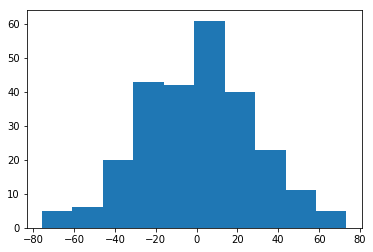

In [27]:
plt.hist(np.dot(a, b).reshape(n_hidden))

## Batch norm math

### Incrementally update variance:

In [ ]:
def update(existingAggregate: Tuple[np.ndarray], 
           newValue: np.ndarray):

    (count, mean, M2) = existingAggregate
    count += 1 
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2

    return (count, mean, M2)

def finalize(existingAggregate: Tuple[np.ndarray]):
    (count, mean, M2) = existingAggregate
    (mean, variance, sampleVariance) = (mean, M2/count, M2/(count - 1)) 
    if count < 2:
        return float('nan')
    else:
        return (mean, variance, sampleVariance)

#### With 2 functions

In [ ]:
np.random.seed(20190110)
a = np.random.randn(1,3)
b = np.random.randn(1,3)
print(a)
print(b)
list1 = [a, b]
stats = (0, np.zeros_like(a), np.zeros_like(a))
for el in list1:
    stats = update(stats, el)

In [ ]:
finalize(stats)

**Check**

In [ ]:
np.var(np.array(list1), axis=0)

#### With 1 function 

In [ ]:
np.random.seed(20190110)
a = np.random.randn(1,3)
b = np.random.randn(1,3)
print(a)
print(b)
list1 = [a, b]
stats = (0, np.zeros_like(a), np.zeros_like(a))
for el in list1:
    stats = update(stats, el)

Doesn't work!

## Batch normalization

### `Layer`

In [ ]:
class Layer(object):

    def __init__(self,
                 neurons: int) -> None:
        self.neurons = neurons
        self.first = True
        self.params: List[Tensor] = []
        self.param_grads: List[Tensor] = []
        self.operations: List[Operation] = []

    def _setup_layer(self, input_: Tensor) -> None:
        pass

    def forward(self, input_: Tensor) -> Tensor:
        if self.first:
            self._setup_layer(input_)
            self.first = False

        self.input_ = input_

        for operation in self.operations:

            input_ = operation.forward(input_)

        self.output = input_

        return self.output

    def backward(self, output_grad: Tensor) -> Tensor:

        assert_same_shapes(self.output, output_grad)

        for operation in self.operations[::-1]:
            output_grad = operation.backward(output_grad)

        input_grad = output_grad

        assert_same_shapes(self.input_, input_grad)

        self._param_grads()

        return input_grad

    def _param_grads(self) -> None:

        self.param_grads = []
        for operation in self.operations:
            if issubclass(operation.__class__, ParamOperation):
                self.param_grads.append(operation.param_grad)

    def _params(self) -> None:

        self.params = []
        for operation in self.operations:
            if issubclass(operation.__class__, ParamOperation):
                self.params.append(operation.param)

### `BatchNorm`

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a / a.var(axis=0)

In [ ]:
a = np.random.randn(32, 3, 28, 28)

In [ ]:
(a - a.mean(axis=0)).shape

In [ ]:
class BatchNorm(Layer):

    def __init__(self) -> None:
        pass
        
    def _setup_layer(self, input_: np.ndarray) -> None:
        obs = input_[0]
        
        self.aggregates = (0,
                           np.zeros_like(obs),
                           np.zeros_like(obs))

        self.params: List[float] = []
        self.params.append(0.)
        self.params.append(1.)
    
    def _update_stats(self, new_input: np.ndarray):

        (count, mean, M2) = self.aggregates
        count += 1 
        delta = new_input - mean
        mean += delta / count
        delta2 = new_input - mean
        M2 += delta * delta2
        
        self.aggregates = (count, mean, M2)
            
        
    def forward(self, input_: np.ndarray,
                inference=False) -> np.ndarray:

        self.input_ = input_
        # https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance
        if not inference:
            for obs in input_:
                self._update_stats(obs)

            self.mean = input_.mean(axis=0)
            self.var = input_.var(axis=0)
        else:
            self.mean, self.var, samp_var = finalize(self.aggregates)             

        self.output = (input_ - self.mean) / (self.var + 1e-8)
        
        self.output *= self.params[0] # gamma
        self.output += self.params[0] # beta
        
        return self.output
    
    def backward(self, 
                 output_grad: Tensor) -> Tensor:

        assert_same_shape(self.output, output_grad)

        # https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html
        dbeta = np.sum(output_grad, axis=0)
        dgamma = np.sum((self.input_ - mu) * \
                        np.sqrt((self.var + 1e-8)) * output_grad, axis=0)
        
        self.param_grads = [dbeta, dgamma]
        
        input_grad = (self.params[1] * np.sqrt(self.var + 1e-8) / N) * \
                     (N * output_grad - np.sum(output_grad, axis=0) - \
                      (self.input_ - self.mean) * (self.var + 1e-8)**(-1.0) * \
                      np.sum(output_grad * (input_ - self.mean), axis=0))

        assert_same_shape(self.input_, input_grad)
        
        return input_grad

Probably not going to include Batch Norm.

## Change

In [ ]:
class Operation(object):

    def __init__(self):
        raise NotImplementedError()
    
    def forward(self, input_: Tensor) -> Tensor:
        raise NotImplementedError()

    def backward(self, output_grad: Tensor) -> Tensor:
        raise NotImplementedError()

In [ ]:
class ParamOperation(Operation):

    def __init__(self, param: Tensor) -> Tensor:
        super().__init__()
        self.param = param
        
    def _param_grad(self, output_grad: Tensor) -> Tensor:
        raise NotImplementedError()

In [ ]:
class WeightMultiply(ParamOperation):

    def __init__(self, 
                 W: Tensor, 
                 param_name: str='W'):
        self.param = W
        self.param_name = param_name
    
    def forward(self, 
                input_: Tensor):
        self.input_ = input_

        # Lines specific to this layer
        assert self.input_.shape[1] == self.param.shape[0], \
        "Mismatch of shapes in WeightMultiply operation"
    
        self.output = torch.mm(input_, self.param)

        return self.output

    def backward(self, 
                 output_grad: Tensor):
        assert_same_shape(self.output, output_grad)

        # Lines specific to this layer        
        input_grad = torch.mm(output_grad, self.param.transpose(0, 1))
        
        self.param_grad = self._param_grad(output_grad)
        
        assert_same_shape(self.input_, input_grad)
        return input_grad
    
    def _param_grad(self, 
                    output_grad: Tensor):

        # Lines specific to this layer 
        param_grad = torch.mm(self.input_.transpose(0, 1), output_grad)
        
        assert_same_shape(self.param, param_grad)
        return param_grad

In [ ]:
class BiasAdd(ParamOperation):

    def __init__(self, 
                 B: Tensor,
                 param_name: str='B'):
        self.param = B
        self.param_name = param_name
    
    def forward(self, 
                input_: Tensor):
        self.input_ = input_
        
        # Lines specific to this layer         
        assert self.input_.shape[1] == self.param.shape[1], \
        "Mismatch of shapes in BiasAdd operation"
        self.output = torch.add(self.input_, self.param)
        
        return self.output

    def backward(self, 
                 output_grad: Tensor):
        assert_same_shape(self.output, output_grad)
        
        input_grad = torch.ones_like(self.input_) * output_grad
        
        self.param_grad = self._param_grad(output_grad)
        
        assert_same_shape(self.input_, input_grad)
        return input_grad
    
    def _param_grad(self, 
                   output_grad: Tensor):

        param_grad = torch.ones_like(self.param) * output_grad
        
        param_grad = torch.sum(param_grad, dim=0).reshape(1, param_grad.shape[1])
        
        assert_same_shape(self.param, param_grad)
        return param_grad

TODO: 

* Optimizers
    * Blocker: change all operation, layers, network code to Numpy. 
    * Test.
    * Write optimizers.
* Dropout
    * Write operation to show an example of using the "inference" flag.